# SHAP values

Deep SHAP is a high-speed approximation algorithm for SHAP values in deep learning models that builds on a connection with DeepLIFT described in the SHAP NIPS paper. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import shap

from tensorflow.keras.models import load_model

DATA_DIR = '../Datasets/'
MODELS_DIR = '../Models/'

# TRAIN_PATH = DATA_DIR + '/Dataset_train.csv'
# TRAIN_CF_PATH = DATA_DIR + '/Dataset_train_CF.csv'

TEST_PATH = DATA_DIR + '/Dataset_test.csv'
TEST_CF_PATH = DATA_DIR + '/Dataset_test_CF.csv'

MODEL_PATH = MODELS_DIR + 'Pres_hybrid.h5'
MODEL_CF_PATH = MODELS_DIR + 'Pres_hybrid_CF.h5'

SAMPLES = 10_000

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
2024-10-02 09:16:28.165051: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-02 09:16:28.196694: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-02 09:16:28.332914: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-02 09:16:28.332959: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-02 09:16

Load datasets and model, then fit explainer and return SHAP values:

In [2]:
def show_shap_values(test_path, model_path, reduced_size=None):
    
    model = load_model(model_path)

    X_test = pd.read_csv(test_path, index_col=0)
    X_test.reset_index(drop=True, inplace=True)

    if reduced_size:
        test_data = X_test.sample(n=reduced_size, replace=False).to_numpy()
    else:
        test_data = X_test.to_numpy()

    explainer = shap.Explainer(model, test_data, feature_names=X_test.columns)
    shap_values = explainer(test_data)

    return shap_values

## Default model

Plots for the vanilla model and dataset.

In [3]:
shap_values_default = show_shap_values(TEST_PATH, MODEL_PATH, SAMPLES)

2024-10-02 09:16:34.637606: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


KeyboardInterrupt: 

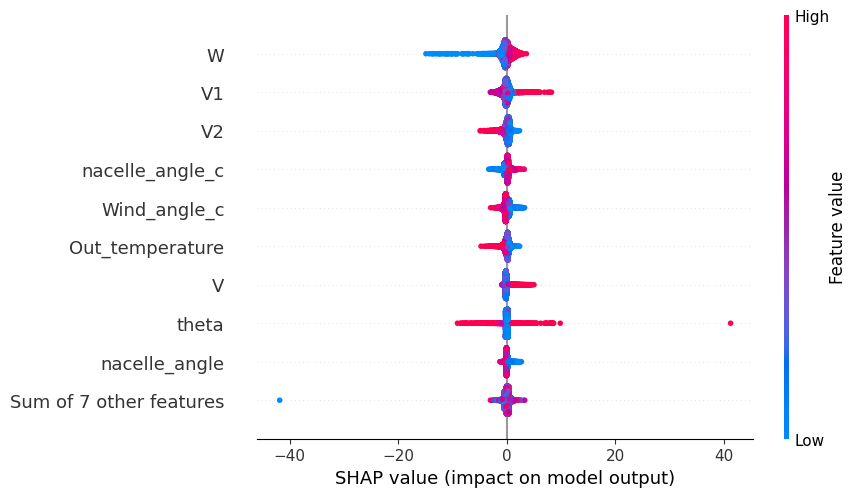

In [4]:
shap.plots.beeswarm(shap_values_default, max_display=10)

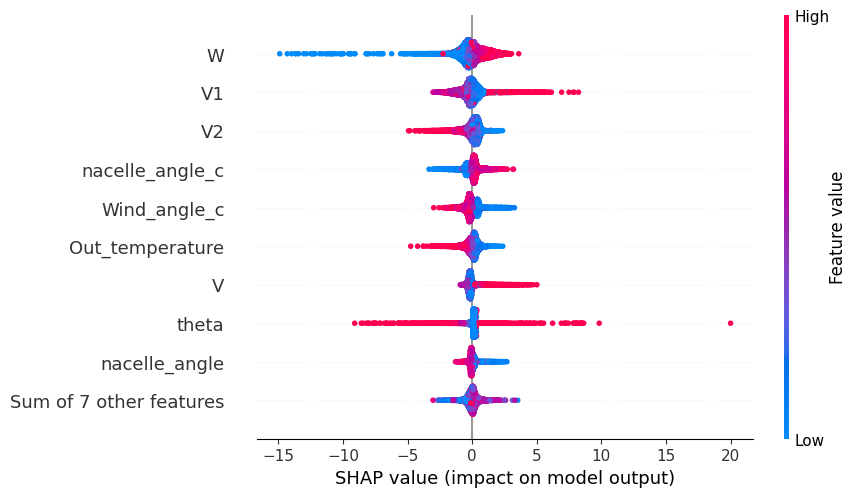

In [5]:
# Removing outliers:
shap_values_default_no_out = shap_values_default
shap_values_default_no_out.values = np.clip(shap_values_default_no_out.values, -20, 20)

shap.plots.beeswarm(shap_values_default_no_out, max_display=10)

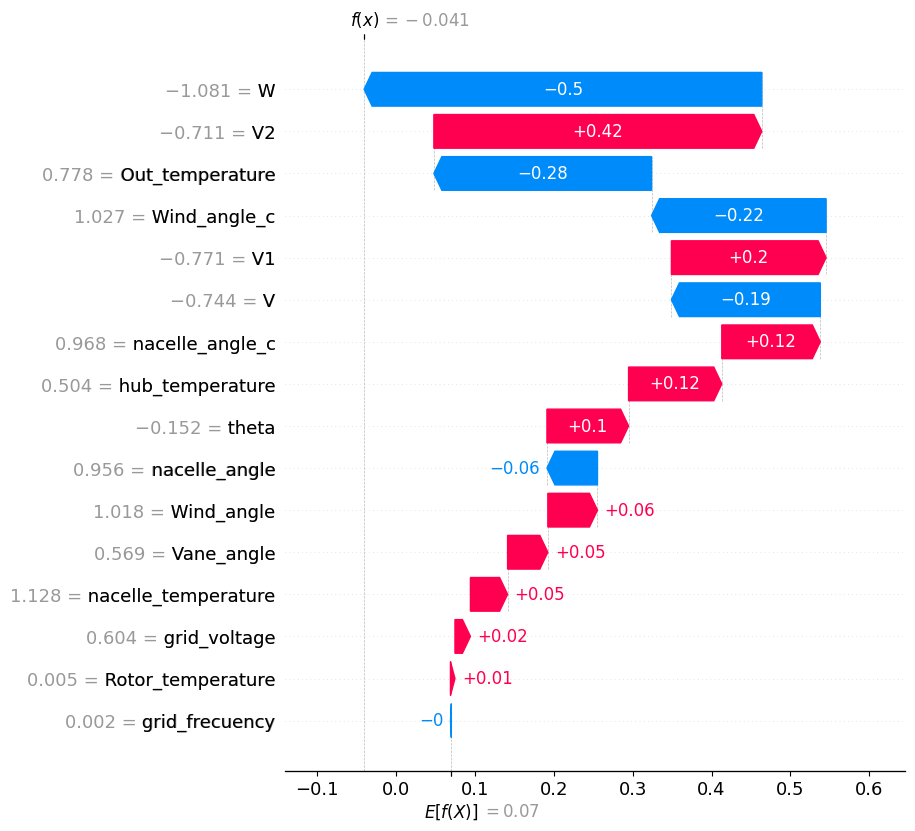

In [6]:
shap.plots.waterfall(shap_values_default[0], max_display=20)

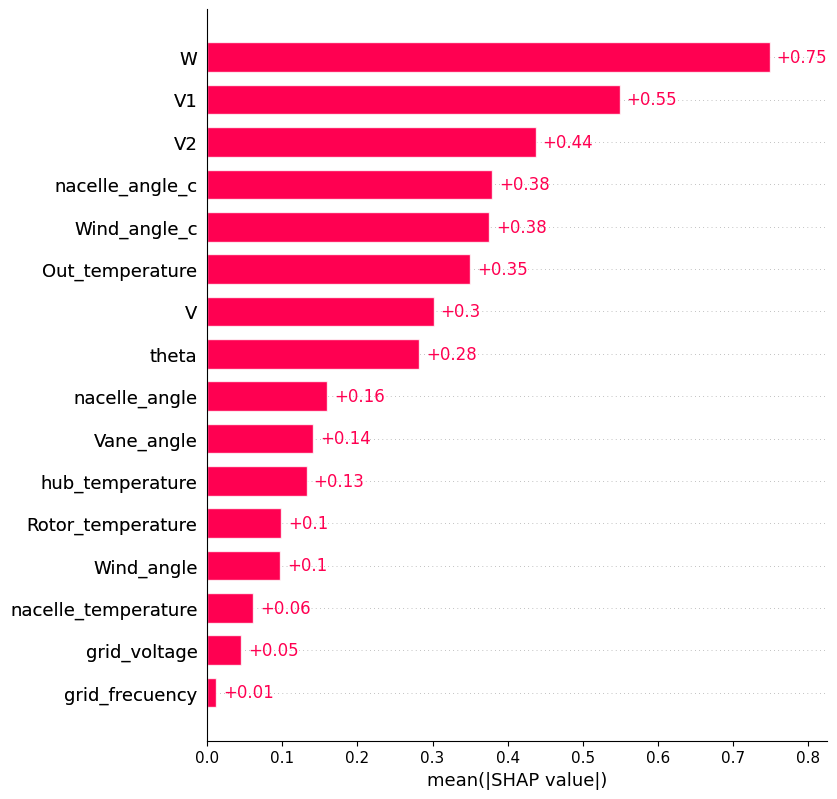

In [7]:
shap.plots.bar(shap_values_default, max_display=20)

## CF Model

Plots for the reduced case after applying correlation filter.

In [4]:
shap_values_CF = show_shap_values(TEST_CF_PATH, MODEL_CF_PATH, SAMPLES)

PermutationExplainer explainer: 10001it [13:56, 11.82it/s]                           


In [73]:
print(shap_values_CF.values.shape)
print(shap_values_CF.base_values.shape)
print(shap_values_CF.data.shape)
shap_values_CF.feature_names

(10000, 12)
(10000, 1)
(10000, 12)


['theta',
 'hub_temperature',
 'nacelle_temperature',
 'V',
 'Vane_angle',
 'Out_temperature',
 'grid_frecuency',
 'grid_voltage',
 'W',
 'Rotor_temperature',
 'Wind_angle_c',
 'nacelle_angle_c']

In [ ]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
#shap.plots.scatter(shap_values_CF[:,0], color=shap_values_CF)

Text(0, 0.5, 'Shap Value W')

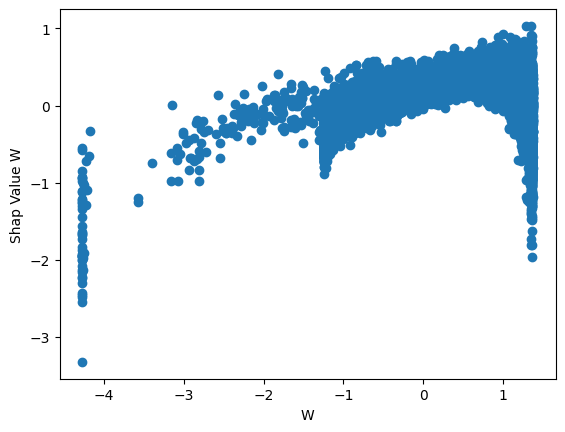

In [70]:
x_id = shap_values_CF.feature_names.index("W")
y_id = shap_values_CF.feature_names.index("W")
plt.scatter(shap_values_CF.data[:,x_id],shap_values_CF.values[:,y_id])
plt.xlabel(shap_values_CF.feature_names[x_id])
plt.ylabel("Shap Value "+shap_values_CF.feature_names[y_id])

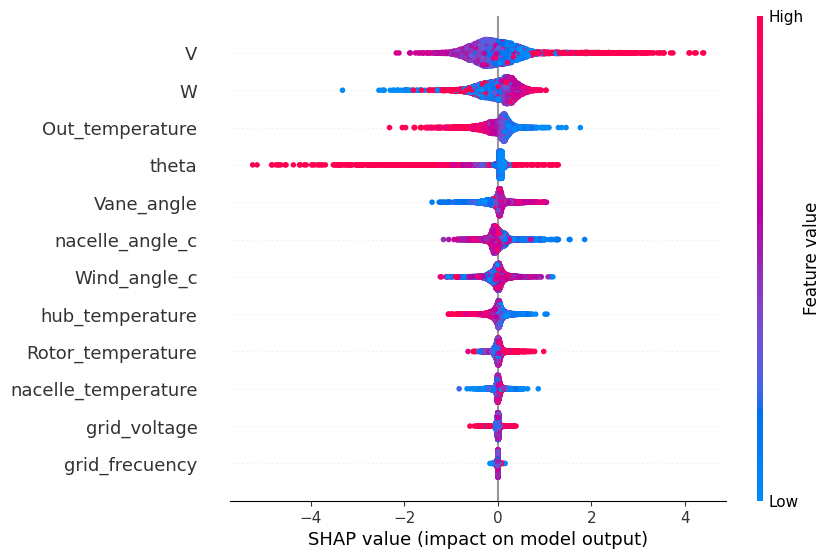

In [74]:
shap.plots.beeswarm(shap_values_CF, max_display=20)

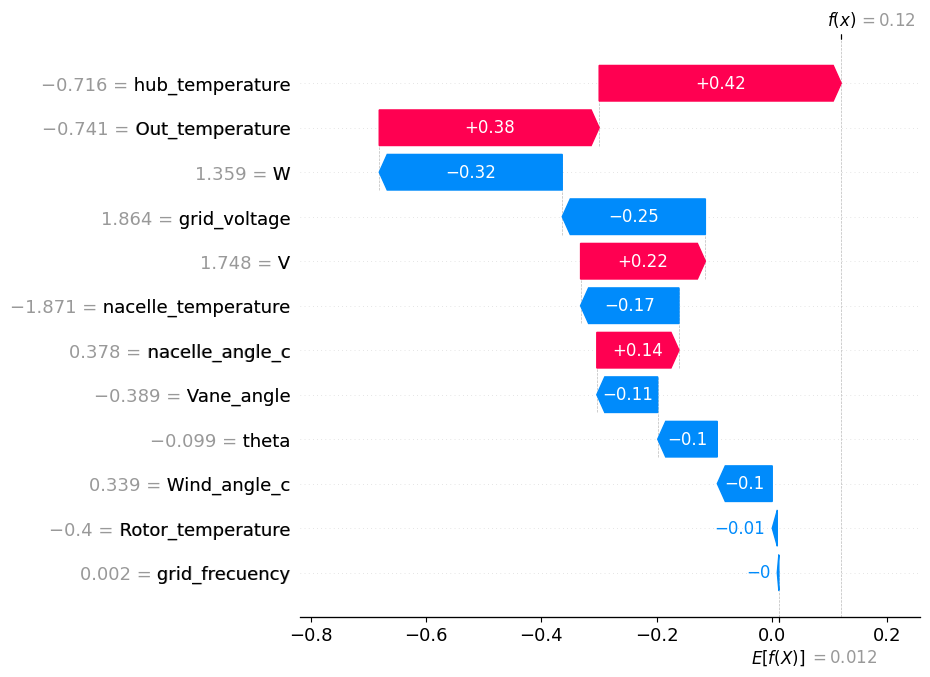

In [75]:
shap.plots.waterfall(shap_values_CF[0], max_display=20)

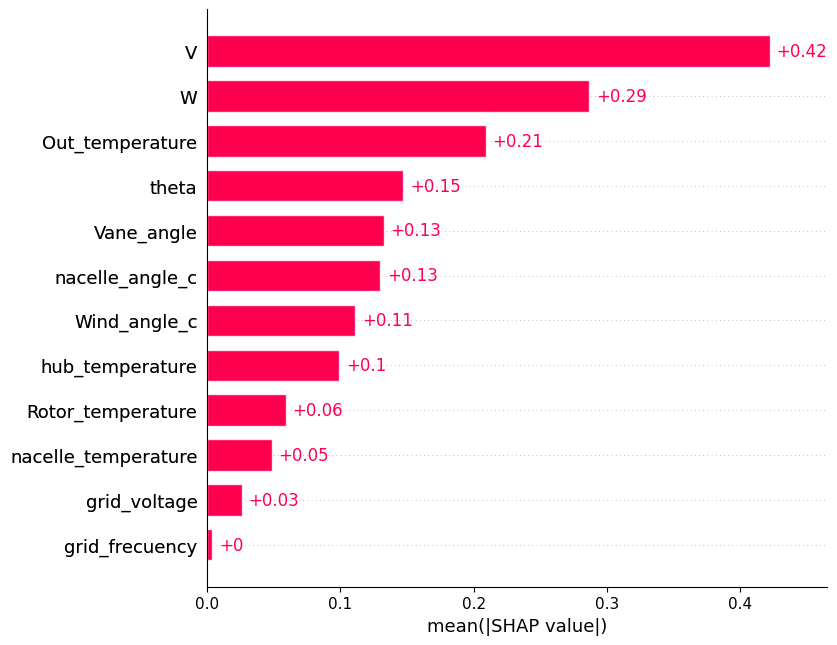

In [76]:
shap.plots.bar(shap_values_CF, max_display=20)